In [230]:
import pandas as pd
import numpy as np
import re
import ast

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MultiLabelBinarizer, PowerTransformer, LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import warnings

In [5]:
#Usaremos el CSV "AllDecks" tras la modificaciones realizadas previamente
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv('../CSV/AllDecks.csv')
df.head()

,code,mainBoard,meta,name,releaseDate,sideBoard,type,edhrecRank_mean,convertedManaCost_mean,artists,names,total_price,deck_color
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,6314.428571,2.709677,"['Noah Bradley', 'Aaron Miller', 'Ben Thompson...","['Abzan Charm', 'Kill Shot', 'Longshot Squad',...",0.68,"['W', 'G', 'B']"
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,2145.052632,2.962025,"['Rebecca Guay', 'Tomasz Jedruszek', 'Eric Des...","['Mosswort Bridge', 'Loyal Guardian', 'Woodlan...",0.00,"['W', 'U', 'G']"
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,10516.052632,3.048780,"['Anson Maddocks', 'M. W. Kaluta & DiTerlizzi'...","['Hollow Dogs', 'Island', 'Air Elemental', 'Ta...",0.00,"['U', 'B']"
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,8699.772727,2.833333,"['Rebecca Guay', 'Charles Gillespie', 'Robert ...","['Island', 'Empyrial Armor', 'Serrated Biskeli...",2.63,"['W', 'U']"
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,11014.800000,3.086957,"['Ron Spears', 'Rebecca Guay', 'Thomas M. Baxa...","['Island', 'Dwarven Scorcher', 'Concentrate', ...",0.68,"['R', 'U']"


In [7]:
le = LabelEncoder()
X = df[['name', 'type', 'deck_color', 'mainBoard']]
Y = df['total_price']
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X.loc[:, 'name'] = le.fit_transform(X['name'])
X.loc[:, 'type'] = le.fit_transform(X['type'])
X.loc[:, 'deck_color'] = le.fit_transform(X['deck_color'])
X.loc[:, 'mainBoard'] = le.fit_transform(X['mainBoard'])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
Y_train_log = np.log1p(Y_train)
Y_test_log = np.log1p(Y_test)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [13]:
# Calcular las métricas de cada uno de los modelos importados
for name, model in models.items():
    model.fit(X_train, Y_train_log)
    Y_pred_log = model.predict(X_test)
    Y_pred = np.expm1(Y_pred_log)
    
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = mean_squared_error(Y_test, Y_pred, squared=False)
    mae = mean_absolute_error(Y_test, Y_pred)
    # Imprimir resultados para ver las metricas de cada modelo
    print(f"Modelo {name}")
    print(f"R2 = {r2}")
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"MAE = {mae}")
    print("\n")

Modelo LinearRegression
R2 = -0.0200029978906211
MSE = 77.45604006097774
RMSE = 8.800911319913281
MAE = 3.4903715604179193


Modelo Ridge
R2 = -0.020006252522161372
MSE = 77.45628720816407
RMSE = 8.800925360901777
MAE = 3.4903698680268924


Modelo Lasso
R2 = -0.05793634967923089
MSE = 80.33658768864345
RMSE = 8.963067984158295
MAE = 3.510011461047632


Modelo ElasticNet
R2 = -0.039858756426086606
MSE = 78.96382820644851
RMSE = 8.886159361976834
MAE = 3.4917610545425504




In [71]:
#Como los resultados no son satisfactorios relizaremos continuaremos con el modelo antiguo
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [73]:
X = df[['name','type','deck_color','mainBoard']]
Y = df['total_price'] 
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X = pd.get_dummies(X, columns=['name'])
X = pd.get_dummies(X, columns=['deck_color'])
X = pd.get_dummies(X, columns=['type'])
X = pd.get_dummies(X, columns=['mainBoard'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Realizaremos los unos gráficos para ver las prediciones del modelo

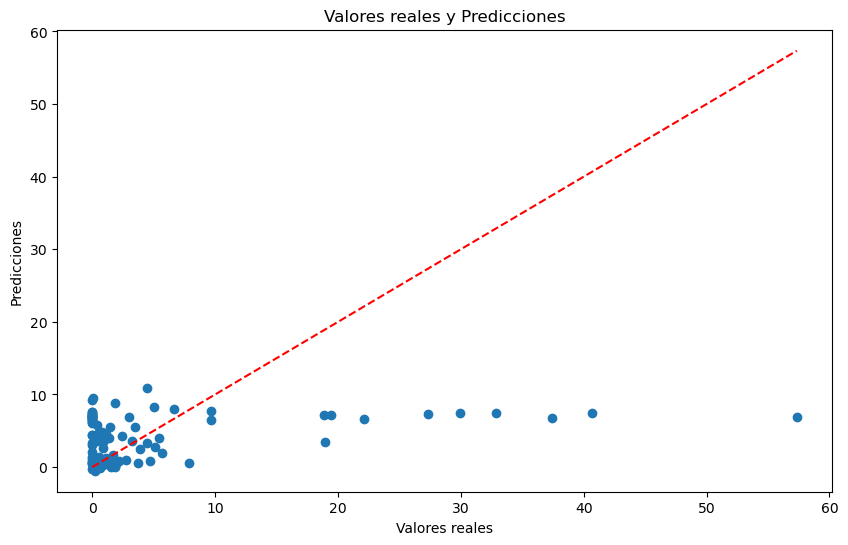

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales y Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

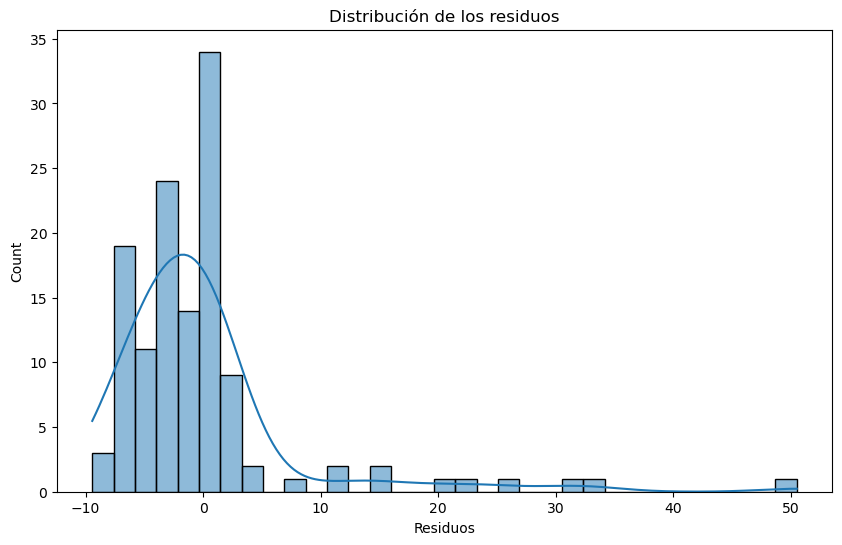

In [21]:
residuos = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()

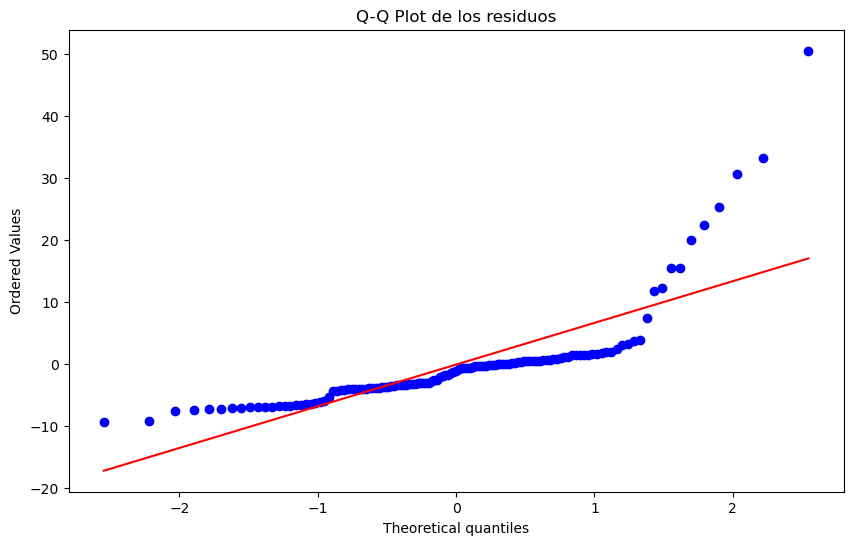

In [37]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

## Podemos realizar observaciones sobre la cantidad de coincidencias en el dataframe

In [98]:
#Numero de veces que se repite el tipo de mazo en el dataframe
typos = {}
for index, row in df.iterrows():
    typo = row['type']
    if typo in typos:
        typos[typo] += 1
    else:
        typos[typo] = 1
        
for typo, count in typos.items():
    print(f'{typo}: {count}')

Intro Pack: 167
Commander Deck: 47
Theme Deck: 184
MTGO Theme Deck: 18
Duel Deck: 52
Planeswalker Deck: 34
Welcome Deck: 20
Challenger Deck: 8
Archenemy Deck: 8
Clash Pack: 9
Guild Kit: 10
Game Night Deck: 5
Planechase Deck: 12
Event Deck: 27
Advanced Deck: 4
Basic Deck: 4
Duel Of The Planeswalkers Deck: 5
Brawl Deck: 4
Premium Deck: 3
Advanced Pack: 2
Starter Deck: 10
Spellslinger Starter Kit: 2


## Como los datos no muestran errores realizaremos modificaciones a los datos para realizar nuevas pruebas

In [101]:
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df['total_price'] < (Q1 - 1.5 * IQR)) | (df['total_price'] > (Q3 + 1.5 * IQR)))]

print(df_filtered)

    code                                          mainBoard  \
0    KTK  [{'artist': 'Zack Stella', 'borderColor': 'bla...   
1    C18  [{'artist': 'Winona Nelson', 'borderColor': 'b...   
2    BTD  [{'artist': 'Doug Chaffee', 'borderColor': 'wh...   
3    WTH  [{'artist': 'Douglas Shuler', 'borderColor': '...   
4    JUD  [{'artist': 'Ron Spears', 'borderColor': 'blac...   
..   ...                                                ...   
629  ITP  [{'artist': 'Dan Frazier', 'borderColor': 'whi...   
630  RQS  [{'artist': 'Christopher Rush', 'borderColor':...   
631  BFZ  [{'artist': 'Daniel Ljunggren', 'borderColor':...   
632  DDP  [{'artist': 'Zoltan Boros & Gabor Szikszai', '...   
634  LGN  [{'artist': 'Thomas M. Baxa', 'borderColor': '...   

                                                  meta                  name  \
0    {'date': '2019-11-10', 'pricesDate': '2019-11-...           Abzan Siege   
1    {'date': '2019-11-10', 'pricesDate': '2019-11-...  Adaptive Enchantment   
2  

In [103]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Crear un nuevo DataFrame para los datos sin outliers
df_no_outliers = df.copy()

for col in num_cols:
    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calcular IQR
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los datos que están dentro de los límites
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Mostrar el DataFrame sin outliers
print(df_no_outliers)

    code                                          mainBoard  \
0    KTK  [{'artist': 'Zack Stella', 'borderColor': 'bla...   
1    C18  [{'artist': 'Winona Nelson', 'borderColor': 'b...   
2    BTD  [{'artist': 'Doug Chaffee', 'borderColor': 'wh...   
3    WTH  [{'artist': 'Douglas Shuler', 'borderColor': '...   
4    JUD  [{'artist': 'Ron Spears', 'borderColor': 'blac...   
..   ...                                                ...   
629  ITP  [{'artist': 'Dan Frazier', 'borderColor': 'whi...   
630  RQS  [{'artist': 'Christopher Rush', 'borderColor':...   
631  BFZ  [{'artist': 'Daniel Ljunggren', 'borderColor':...   
632  DDP  [{'artist': 'Zoltan Boros & Gabor Szikszai', '...   
634  LGN  [{'artist': 'Thomas M. Baxa', 'borderColor': '...   

                                                  meta                  name  \
0    {'date': '2019-11-10', 'pricesDate': '2019-11-...           Abzan Siege   
1    {'date': '2019-11-10', 'pricesDate': '2019-11-...  Adaptive Enchantment   
2  

In [111]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
X = df_no_outliers[['name','type','deck_color','mainBoard']]
Y = df_no_outliers['total_price'] 
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X = pd.get_dummies(X, columns=['name'])
X = pd.get_dummies(X, columns=['deck_color'])
X = pd.get_dummies(X, columns=['type'])
X = pd.get_dummies(X, columns=['mainBoard'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)

# valor de las metricas
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = 0.23093599721239
MSE = 0.7897662012508935
RMSE = 0.8886879099272665
MAE = 0.5844882360306973


In [87]:
Y_pred = model.predict(X_test)
Y_pred

array([ 1.48870284,  0.94800825,  0.63764832,  0.93919842,  0.81347653,
        0.63877048,  0.77426669,  1.21690336,  0.63224425,  0.79011344,
       -0.03347539,  0.76579562,  0.57125447,  0.63801855,  0.57181628,
        0.98691367,  0.7843236 ,  0.72073901,  0.78426402,  1.19522336,
        0.47727466,  1.03064098,  0.12687946,  1.78079202,  0.78414897,
        0.94942464,  0.27858394,  1.86903478,  1.06111967,  0.59422706,
        0.81077296,  0.78486221,  0.95068875,  0.44063844,  0.86187124,
        0.36444109,  0.65295328,  0.95297042,  1.38041843,  0.80397887,
        0.95774451,  0.94183922,  1.00364397,  0.44687392,  0.78643991,
        0.49274336,  0.76685124,  0.72474657,  0.57125447,  0.65537555,
        0.92833764,  0.97450223,  0.78481406,  0.78192949,  2.0370356 ,
        0.8058328 ,  2.15959632,  0.77035178,  1.10742317,  0.81684482,
        0.3806463 ,  0.97232299,  0.81166658,  0.80630611,  0.80207223,
        0.86308303,  0.78232067,  0.05884143,  2.28704566,  1.35

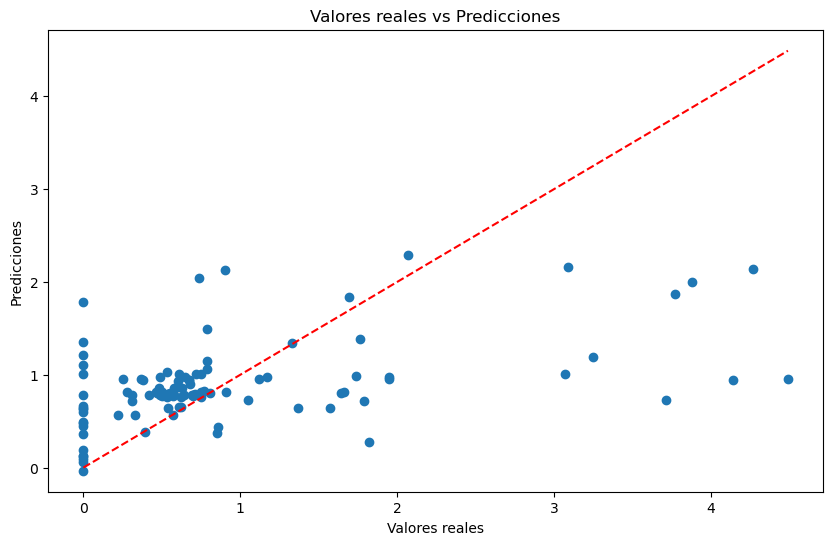

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

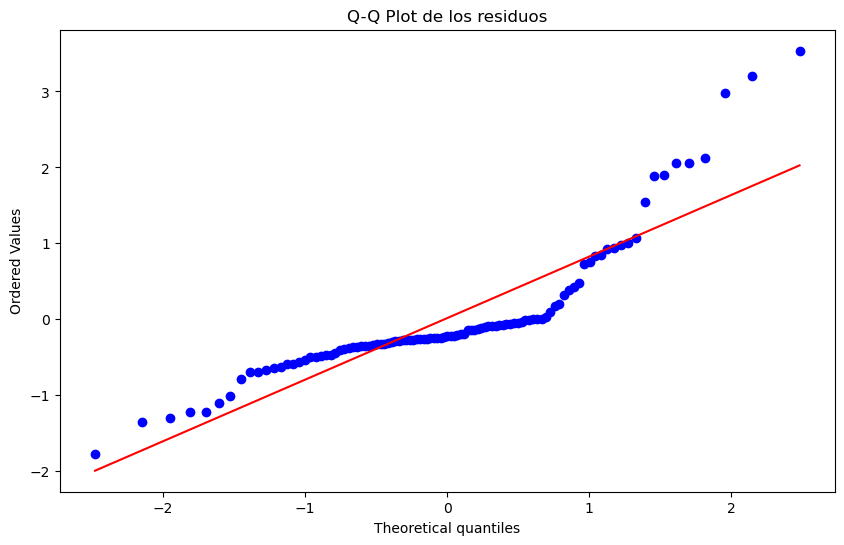

In [50]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

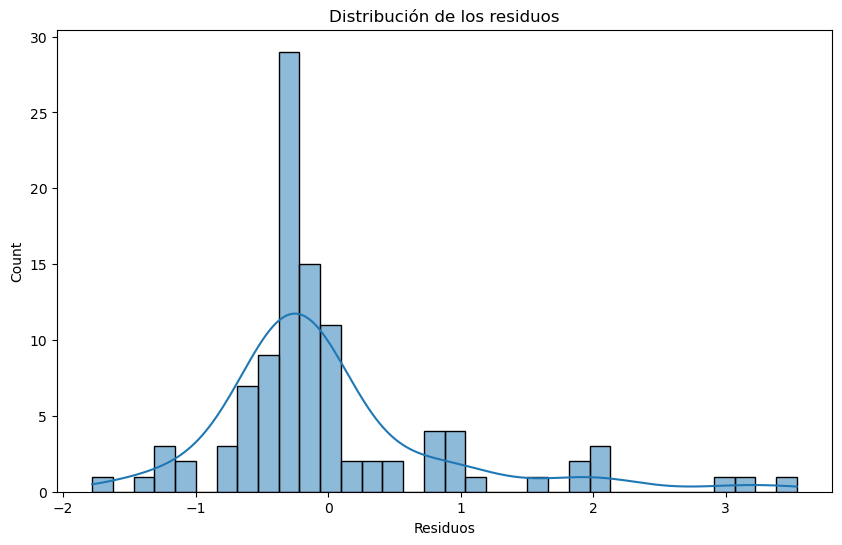

In [52]:
residuos = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()

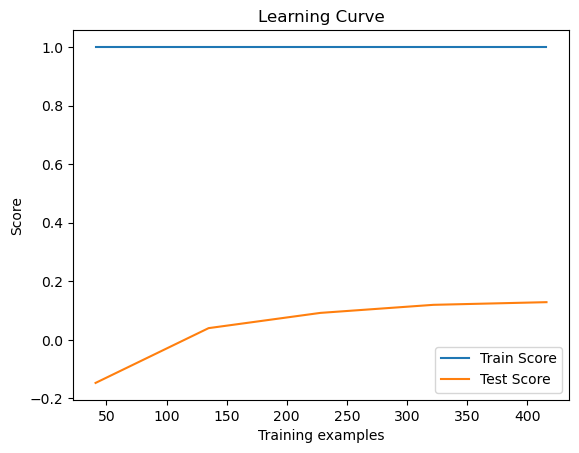

In [131]:
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train Score")
plt.plot(train_sizes, test_scores_mean, label="Test Score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Vamos a usar los datos segmentados en columnas previamente para un nuevo analisis

In [74]:
df = pd.read_csv('../CSV/AllDecks.csv')

X = df[['name', 'type', 'deck_color', 'edhrecRank_mean', 'convertedManaCost_mean', 'artists', 'names', 'meta','type']]
Y = df[['total_price']]

X = pd.get_dummies(X, columns=['name', 'deck_color', 'type', 'artists', 'names', 'meta','type'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [90]:
#Calcularemos las metricas para ver la diferencia
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)

# valor de las metricas
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = -0.039858756426086606
MSE = 78.96382820644851
RMSE = 8.886159361976834
MAE = 3.4917610545425504


## Los resultados son menos validos que los que ya obtuvimos, pero aun asi vamos a realizarles pruebas para asi poder ver la diferencia gráficamente

In [104]:
Y_pred = model.predict(X_test)
Y_pred

array([0.76890575, 0.87192041, 1.04817665, 0.86772082, 0.70147909,
       0.76985683, 0.87793297, 0.91745157, 0.94596893, 1.00338108,
       0.946813  , 0.66321621, 0.69424647, 0.76781054, 0.83173755,
       0.9818987 , 0.65645021, 0.76962352, 1.01947949, 0.64476687,
       0.76843913, 0.72504343, 0.79247009, 0.67978124, 0.70731185,
       0.93421425, 0.72992511, 0.93118121, 0.98844923, 1.02830961,
       1.04584355, 0.78033796, 0.69774613, 0.73064287, 0.76353962,
       0.84602297, 0.65479921, 0.97468392, 0.7654061 , 0.77567175,
       0.9057504 , 0.99146442, 0.87886622, 0.80377598, 0.84578966,
       0.75007896, 1.25244795, 0.74884107, 0.69447978, 0.92606622,
       0.6993793 , 0.9104166 , 0.8945515 , 0.71944398, 0.63520115,
       0.88451916, 0.96694902, 0.6858473 , 0.87726871, 0.92301535,
       0.91858246, 0.82479174, 0.94611307, 0.749541  , 1.00872938,
       0.82735815, 0.95474555, 0.97116643, 0.66881566, 0.97351737,
       0.78990368, 1.06332398, 0.67324855, 0.98496741, 0.95226

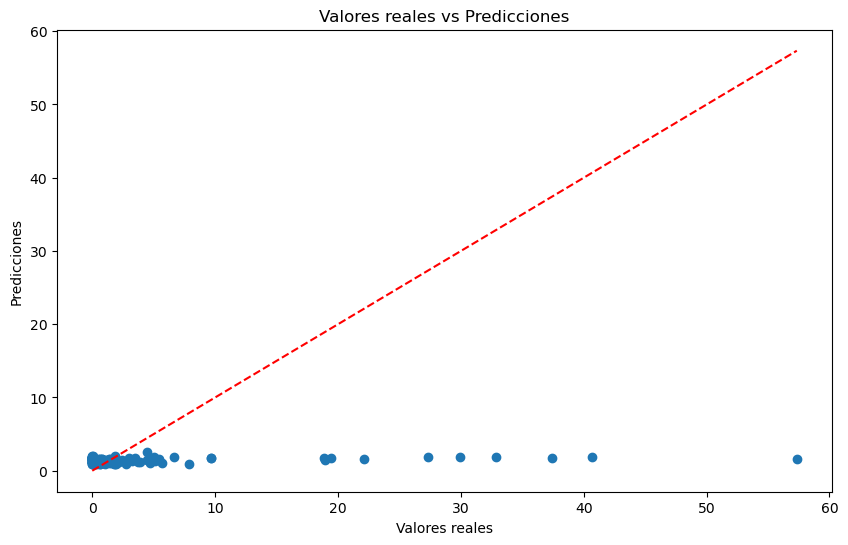

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

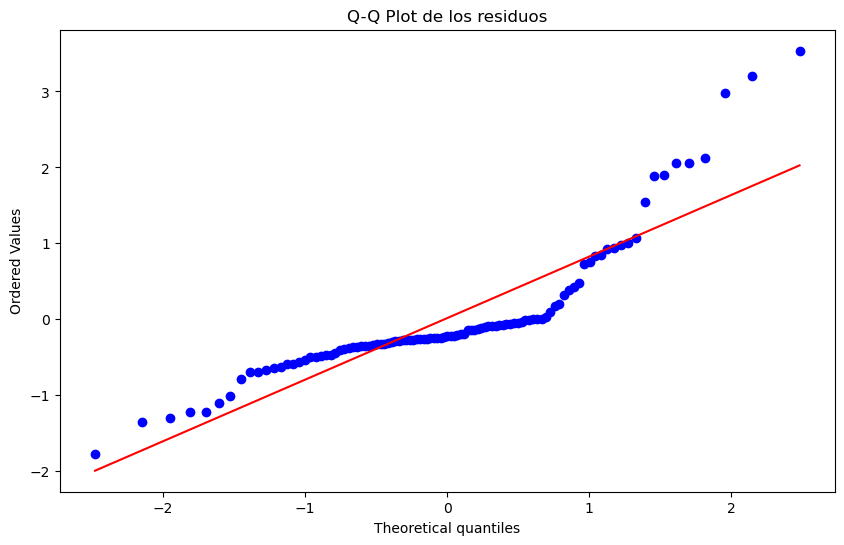

In [98]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

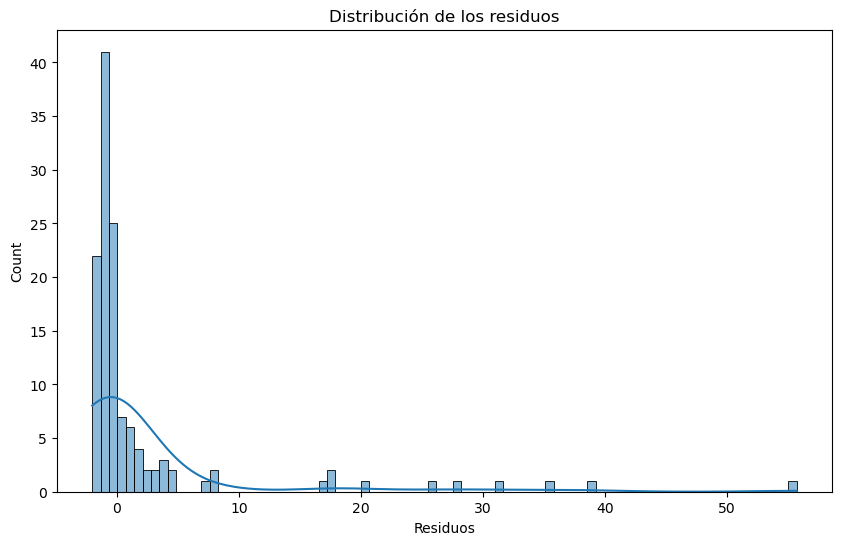

In [100]:
residuos = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()

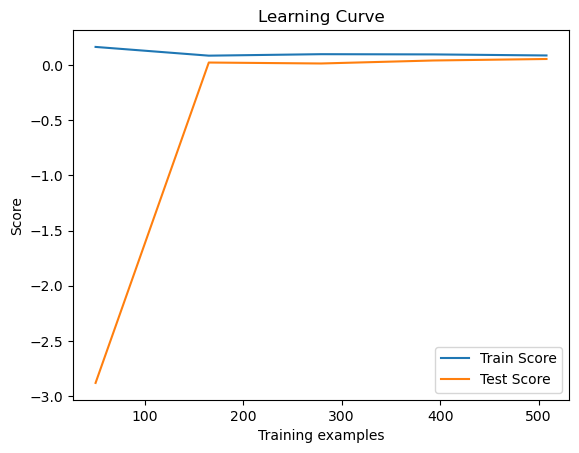

In [110]:
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Train Score")
plt.plot(train_sizes, test_scores_mean, label="Test Score")
plt.ylabel("Score")
plt.xlabel("Training examples")
plt.title("Learning Curve")
plt.legend()
plt.show()

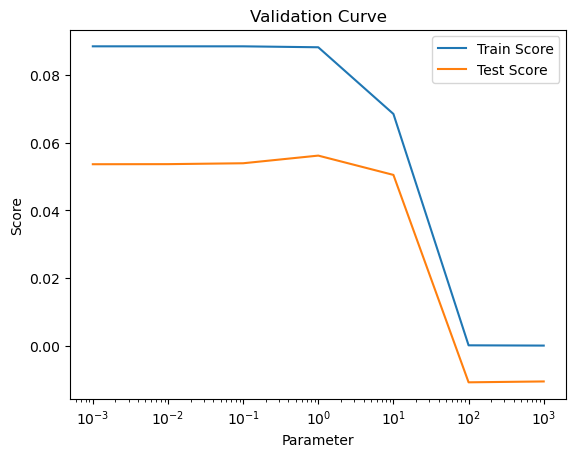

In [114]:
param_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(model, X, Y, param_name="alpha", param_range=param_range, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(param_range, train_scores_mean, label="Train Score")
plt.plot(param_range, test_scores_mean, label="Test Score")
plt.ylabel("Score")
plt.xlabel("Parameter")
plt.title("Validation Curve")
plt.xscale("log")
plt.legend()
plt.show()

In [209]:
df = pd.read_csv('../CSV/dfMazos_V2.csv')

# Seleccionar las columnas originales y las de cartas para añadirlar
X_initial = df[['name', 'releaseDate', 'edhrecRank_mean', 'type']]
cartas_columns = df.filter(regex='^carta_').iloc[:, :88]  
 
# Aplicar get_dummies a las columnas categóricas y convertir las columnas de cartas a tipo float
X_initial = pd.get_dummies(X_initial, columns=['name', 'releaseDate', 'type'])
cartas_columns = cartas_columns.apply(pd.to_numeric, errors='coerce').fillna(0)

# Concatenar las columnas de cartas
X = pd.concat([X_initial, cartas_columns], axis=1)

# Por último definimos y con la variable del precio
Y = df['total_price']

In [263]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Hacer predicciones
Y_pred = model.predict(X_test_scaled)

In [242]:
# Crearemos las metricas para ver el desempeño
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = -1.0019901915465514e+27
MSE = 7.608820030689645e+28
RMSE = 275840896726530.47
MAE = 99600221542325.45


## Comprobaremos con otros modelos ya que los resultados son decepcionantes.

In [247]:
ridge_model_optimal = Ridge(alpha=0.1)
ridge_model_optimal.fit(X_train_scaled, Y_train)

# Hacer predicciones
Y_pred_optimal = ridge_model_optimal.predict(X_test_scaled)

# Calcular métricas
r2 = r2_score(Y_test, Y_pred_optimal)
mse = mean_squared_error(Y_test, Y_pred_optimal)
rmse = np.sqrt(mse_optimal)
mae = mean_absolute_error(Y_test, Y_pred_optimal)

# Imprimir las métricas
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = 0.7785143284483271
MSE = 16.81897316391866
RMSE = 4.101094142289185
MAE = 2.5380863151517032


C:\Users\Corre\AppData\Local\Temp\ipykernel_17380\1162347614.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 15], [0, 15], 'k--', color='red')  # Línea de referencia donde Real = Predicción


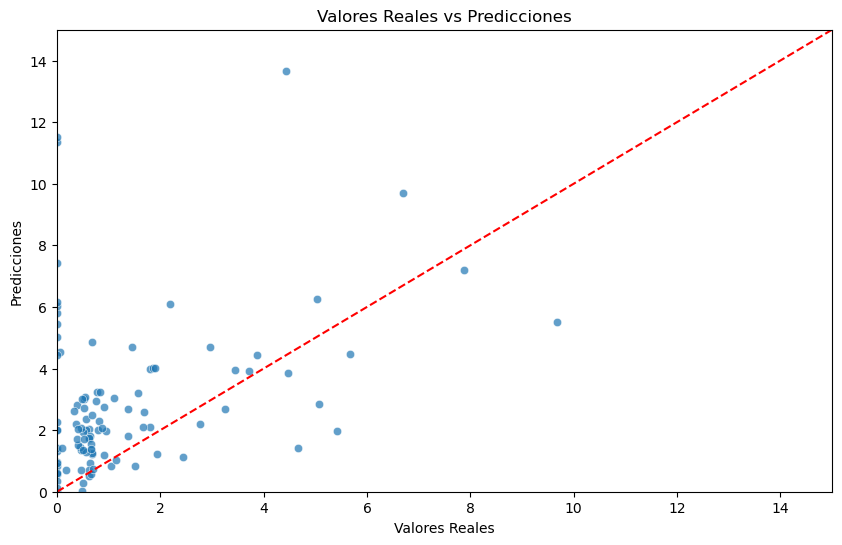

In [257]:
results_df = pd.DataFrame({
    'Real': Y_test,
    'Predicción': Y_pred_optimal})

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicción', data=results_df, alpha=0.7)
plt.plot([0, 15], [0, 15], 'k--', color='red')  # Línea de referencia donde Real = Predicción

# definimos la leyenda
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.xlim(0, 15)  
plt.ylim(0, 15)

plt.show()

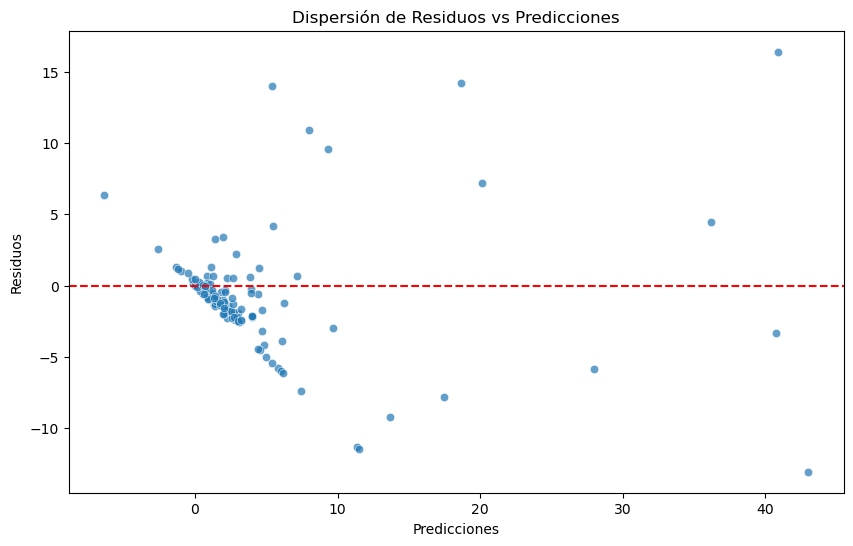

In [259]:
residuos = Y_test - Y_pred_optimal

# Crear un DataFrame con los residuos y las predicciones
residuos_df = pd.DataFrame({
    'Residuos': residuos,
    'Predicción': Y_pred_optimal
})

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicción', y='Residuos', data=residuos_df, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en y=0 para referencia

plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Dispersión de Residuos vs Predicciones')

plt.show()

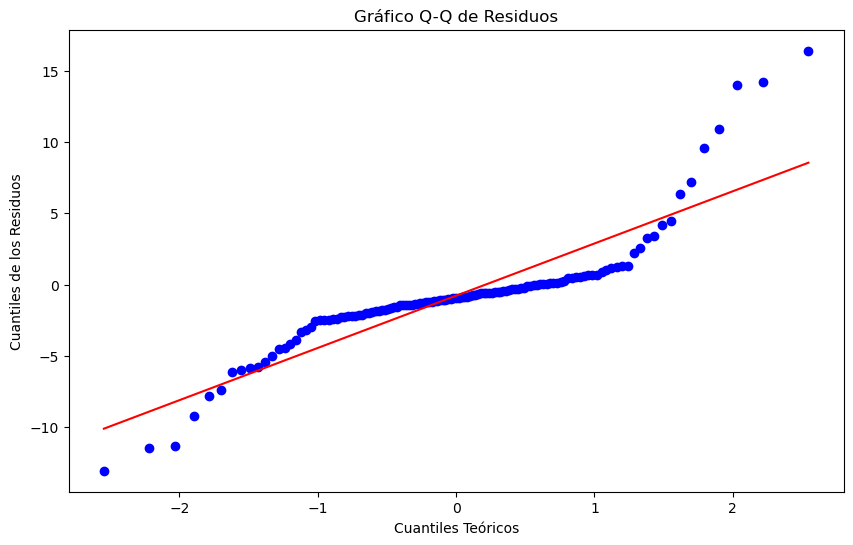

In [261]:
# Grafico Q-Q
residuos = Y_test - Y_pred_optimal
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')

plt.show()